# __Projet Maths-Info #2 : Choix du pas de temps__

Binôme: Julien LAVAL et Nathan LINÉ.

Ce notebook traite de l'adaptation du pas de temps lors de la résolution approchée d'équations différentielles linéaires.

Tout d'abord, on importe les librairies Python dont on aura besoin : 

In [6]:
import numpy as np 
import matplotlib.pyplot as plt

## Pas fixe 

On note $x_0 = x(t_0)~$ la condition initiale, $dt$ le pas de temps fixe, $f~$ la fonction telle que $\dot x(t) = f(x,t)$, et enfin $t_{max}$ la valeur maximale de l'intervalle sur lequel la solution approchée est calculée.

### Schéma d'Euler explicite :

#### Fonction : 

In [7]:
def solve_euler_explicit(f, x0, dt, t0, tmax):
    x, t = [], []
    xi, ti = x0, t0
    N = int((tmax - t0)/dt) + 1 # Nombre de pas
    for loop in range(N):
        x.append(xi)
        t.append(ti)
        xi += dt*f(ti, xi)
        ti += dt
    return t, x

#### Test :

On considère l'équation différentielle $\dot x = ax$, avec $a \in \mathbb{R}.$  
La solution est $x: t \rightarrow e^{ax}$. Pour l'exemple, nous prendront ici $a = 1$ : nous avons alors $f = Id$.

In [8]:
def f(t,x):
    return x

In [9]:
t0, tmax = 0, 10
x0 = np.exp(t0)
dts = [1, 1/2, 1/4, 1/8, 1/16] # Différents pas décroissants.

 écart maximal pour dt = 1 : 21000
 écart maximal pour dt = 0.5 : 18700
 écart maximal pour dt = 0.25 : 14500
 écart maximal pour dt = 0.125 : 9660
 écart maximal pour dt = 0.0625 : 5710


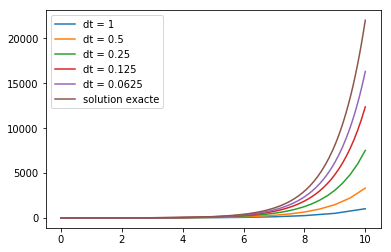

In [10]:
# Solutions approchées : 
for i in range(len(dts)):
    t, x = solve_euler_explicit(f, x0, dts[i], t0, tmax)
    x_exact = np.exp(t)
    y = abs(x-x_exact)
    
    plt.plot(t, x, label = f'dt = {dts[i]}')
    print(f' écart maximal pour dt = {dts[i]} : {int(round(max(y),-1))}')

# Solution exacte :
x_exact = np.exp(t)
plt.plot(t, x_exact, label = 'solution exacte') # Tracé avec le plus grand nombre de points des solutions approchées.


plt.legend()
plt.show()

On remarque que l'écart maximal est bien décroissant lorsque $dt$ décroit, ce qui peut amener à penser qu'il tendra vers 0 lorsque $dt \rightarrow 0$. 

### Méthode d'ordre 2 : Heun

#### Fonction 

In [11]:
def solve_heun_explicit(f, x0, dt, t0, tmax):
    x, t = [], []
    xi, ti = x0, t0
    N = int((tmax - t0)/dt) + 1 # Nombre de pas
    for loop in range(N):
        x.append(xi)
        t.append(ti)
        xi += dt/2*(f(ti, xi) + f(ti + dt, xi + dt*f(ti,xi)))
        ti += dt
    return t, x

#### test

Avec toujours la même équation différentielle, on a : 

 écart maximal pour dt = 1 : 12490
 écart maximal pour dt = 0.5 : 5540
 écart maximal pour dt = 0.25 : 1830
 écart maximal pour dt = 0.125 : 520
 écart maximal pour dt = 0.0625 : 140


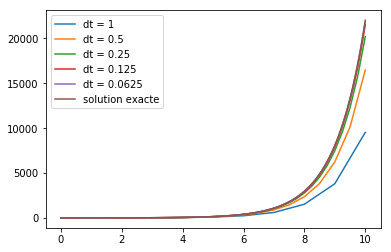

In [12]:
# Solutions approchées : 
for i in range(len(dts)):
    t, x = solve_heun_explicit(f, x0, dts[i], t0, tmax)
    x_exact = np.exp(t)
    y = abs(x-x_exact)
    
    plt.plot(t, x, label = f'dt = {dts[i]}')
    print(f' écart maximal pour dt = {dts[i]} : {int(round(max(y),-1))}')

# Solution exacte :
x_exact = np.exp(t)
plt.plot(t, x_exact, label = 'solution exacte') # Tracé avec le plus grand nombre de points des solutions approchées.


plt.legend()
plt.show()

De même, la convergence semble assurée par le fait que l'écart maximal soit décroissant majoré par 0. Cependant, on observe alors une convergence plus rapide que pour la méthode d'ordre 1. Utilisons une base décimale pour comparer la variation de l'écart maximale en fonction du pas : 

In [13]:
dtsp = [1, 0.1, 0.01, 0.001, 0.0001]

In [14]:
# Solutions approchées : 
for i in range(len(dts)):
    t1, x1 = solve_euler_explicit(f, x0, dtsp[i], t0, tmax)
    t2, x2 = solve_heun_explicit(f, x0, dtsp[i], t0, tmax)
    x_exact = np.exp(t1)
    y1 = abs(x1-x_exact)
    y2 = abs(x2-x_exact)
    
    print(f'dt = {dtsp[i]} : Euler :{round(max(y1), 5)}, Heun :{round(max(y2), 5)} ')

dt = 1 : Euler :21002.46579, Heun :12489.72263 
dt = 0.1 : Euler :8245.85345, Heun :338.05142 
dt = 0.01 : Euler :1067.31016, Heun :3.64335 
dt = 0.001 : Euler :109.78446, Heun :0.03668 
dt = 0.0001 : Euler :11.00975, Heun :0.00037 


Comme vu auparavant, les deux méthodes semblent avoir un écart max qui tend vers 0 lorsque dt tend vers 0.   
Cependant, pour la méthode d'Euler, l'écart max est environ divisé par 10 lorsque le pas l'est, alors qu'il est environ divisé par 100 lorsque le pas est divisé par 10 dans la méthode de Heun. On retrouve une méthode d'Euleur d'ordre 1, en O($dt$) et une méthode de Heun d'ordre 2, en O($dt^2$).

## Adaptation du pas de temps

$\diamond$ Soit $f $  une fonction $\mathcal{C}^1$, associée à un schéma d'Euleur explicite.

$\triangleright$ L'erreur locale est donnée par :  
$ e^{j+1} = (\, z^{j} + \int_{t_{j}}^{t_{j+1}} f(s,z(s)) \, \mathrm{d}s \,)  - x^{j+1}, \; $ où $z$ est solution de :  
$\left \lbrace
\begin{array}{rl}
    z(t)  & = f(t,z(t))\\
    z(t_{j}) &= x^{j}\\
\end{array}
\right.$  

d'où : $e^{j+1} = z(t_{j+1}) - x^{j+1}$  

Comme $f$ est $\mathcal{C}^1$, $z$ est $\mathcal{C}^2$ et son développement de Taylor autour de $t_j$ évaluté en $t_{j+1}$ donne :  
$z(t_{j+1}) = z(t_{j}) + \Delta t_{j} \frac{dz}{dt} (t_{j})  + \frac{\Delta t_{j}^{2}}{2} \frac{d^{2}z}{dt^{2}}(t_{j}) + O (\Delta t_{j}^{3})$  
$= x^{j+1} + \frac{\Delta t_{j}^{2}}{2} \frac{d^{2}z}{dt^{2}}(t_{j}) + O (\Delta t_{j}^{3}) \;$ par définition de z.     
Ainsi, $e^{j+1} = \frac{\Delta t_{j}^{2}}{2} \frac{d^{2}z}{dt^{2}}(t_{j}) + O (\Delta t_{j}^{3})$  

Soit $\Phi : t \to f(t,x(t))$, $\,$ qui est $\mathcal{C}^1$.  
$\dfrac{d^{2}z}{dt^{2}}(t_{j}) = \Phi'(t_{j})\\ 
\; \; \; \; \; \; \, \; \; \; \;= df(t_j, \,z(t_j))\;(1, \, \dfrac{dz}{dt}(t_j))\\
\; \; \; \; \; \; \, \; \; \; \;= df(t_j, \,z(t_j))) \; (1, \, f(t_j)) \\
\; \; \; \; \; \; \, \; \; \; \;= \partial_x f(t_j, \, x^j) + f(t_j) \partial_y f(t_j, \, x^j)$  

$\Rightarrow e^{j+1} = \frac{\Delta t_j^2}{2} (\partial_x f(t_j, \, x^j) + f(t_j) \partial_y f(t_j, x^j) ) + O(\Delta t_j^3)$.

$\triangleright$ Or $f(t_{j+1}, \, x^{j+1}) = f(t_j, \, x^j) + \Delta t_j \partial_x f (t_j, \,x^j) + (x^{j+1} - x^j) \partial_y f (t_j,\, x^j) + O(\Delta t_j^3) \quad$ par développement de Taylor à deux variables de $f$.
$\Rightarrow \frac{\Delta t_j}{2} (f(t_{j+1}, \, x^{j+1}) - f(t_j, \, x^j)) = e^{j+1} + O(\Delta t_j^3)$  

Par seconde inégalité triangulaire,  
$ \left \vert \Vert \frac{\Delta t_j}{2} (f(t_{j+1}, \, x^{j+1}) - f(t_j, \, x^j))\Vert - \Vert e^{j+1} \Vert \right \vert \leq \Vert \frac{\Delta t_j}{2} (f(t_{j+1}, \, x^{j+1}) - f(t_j, \, x^j) - e^{j+1} \Vert = O(\Delta t_j^3)$  

donc $\boxed{\Vert e^{j+1} \Vert = \Vert \frac{\Delta t_j}{2} (f(t_{j+1}, \, x^{j+1}) - f(t_j, \, x^j)) \Vert + O(\Delta t_j^3)}$  

$\diamond$ Selon la question précédente,  
$e^{j+1} = \frac{\Delta t_j^2}{2} (\partial_x f(t_j, \, x^j) + f(t_j) \partial_y f(t_j, \, x^j) ) + O(\Delta t_j^3)\\
\Rightarrow \boxed{e^{j+1} = O(\Delta t_j^2)}$


Justification de la stratégie de prendre $\Delta t_{new} = \Delta t \sqrt{\dfrac{Tol_{abs}}{\Vert e^{j+1} \Vert}}$ :  


$\diamond$ On reprend le code donné dans le notebook Equation Differentielles II.ipynb : 

In [19]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)
            x_back = x_next - dt * f(x_next)
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        ts = vstack([ts,t_next])
        xs = vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T)

$\triangleright$ Explication du solveur :  

Les différents paramètres d'entrée  de ce solveur sont les suivants :
* f : fonction dans le problème à résoudre
* t0, t_f : intervalle de temps sur lequel on résoud l'équation différentielle 
* x0 : condition initiale dans le problème à résoudre
* dtmax : intervalle de temps global de stockage des valeurs 
* dtmin : intervalle de temps minimal, en dessous duquel le pas est trop faible et le solveur trop long : on retourne une erreur
* atol : tolérance d'erreur locale $Tol_{abs}$

Le solveur commence par fixer un pas d'intégration de façon qualitative à dtmax/10, qui représentera le premier pas qui sera fait avant d'être adapté en fonction de l'erreur. Il créé ensuite deux listes qui stockeront les temps de prise de valeurs t0, t0 + dtmax, t0 + 2dtmax..., ainsi que les valeurs calculées de la fonction solution en ces temps. 
La variable $t$ stocke le temps actuel où est effectuée l'estimation, alors que la variable $t_i$ stocke le temps depuis le dernier point de stockage, elle doit donc être comprise entre $0$ et $dtmax$. 

Première boucle while, pour stocker des valeurs dans les deux listes tant que l'on reste dans l'intervalle $[t_0, t_f]$. Deuxième boucle while, pour avancer localement dans un des intervalles en modifiant le pas tant que la variable $t_i$ est plus faible que $dtmax$. 

$\triangleright$ Illustration du fonctionnement du solveur :  

On applique le solveur à l'équation différentielle $y'' + \frac{2}{t} y' - \frac{1}{t^4} y = 0, t>0$, dont une solution est la fonction $g: t \to \sin(\frac{1}{t})$.

In [20]:
def f(t,x):
    return [x[1], -(1/t**4) * x[0] + 2/t* x[1]]

ts, xs = solve_ivp_euler_explicit_variable_step(f, 0.1, [np.sin(1), np.cos(1)], 1, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6)

TypeError: f() missing 1 required positional argument: 'x'